Cp of He: 20.786030000486836
Cp of CO: 29.145011801888888
Cp of H2: 28.84948318644444


<IPython.core.display.Javascript object>


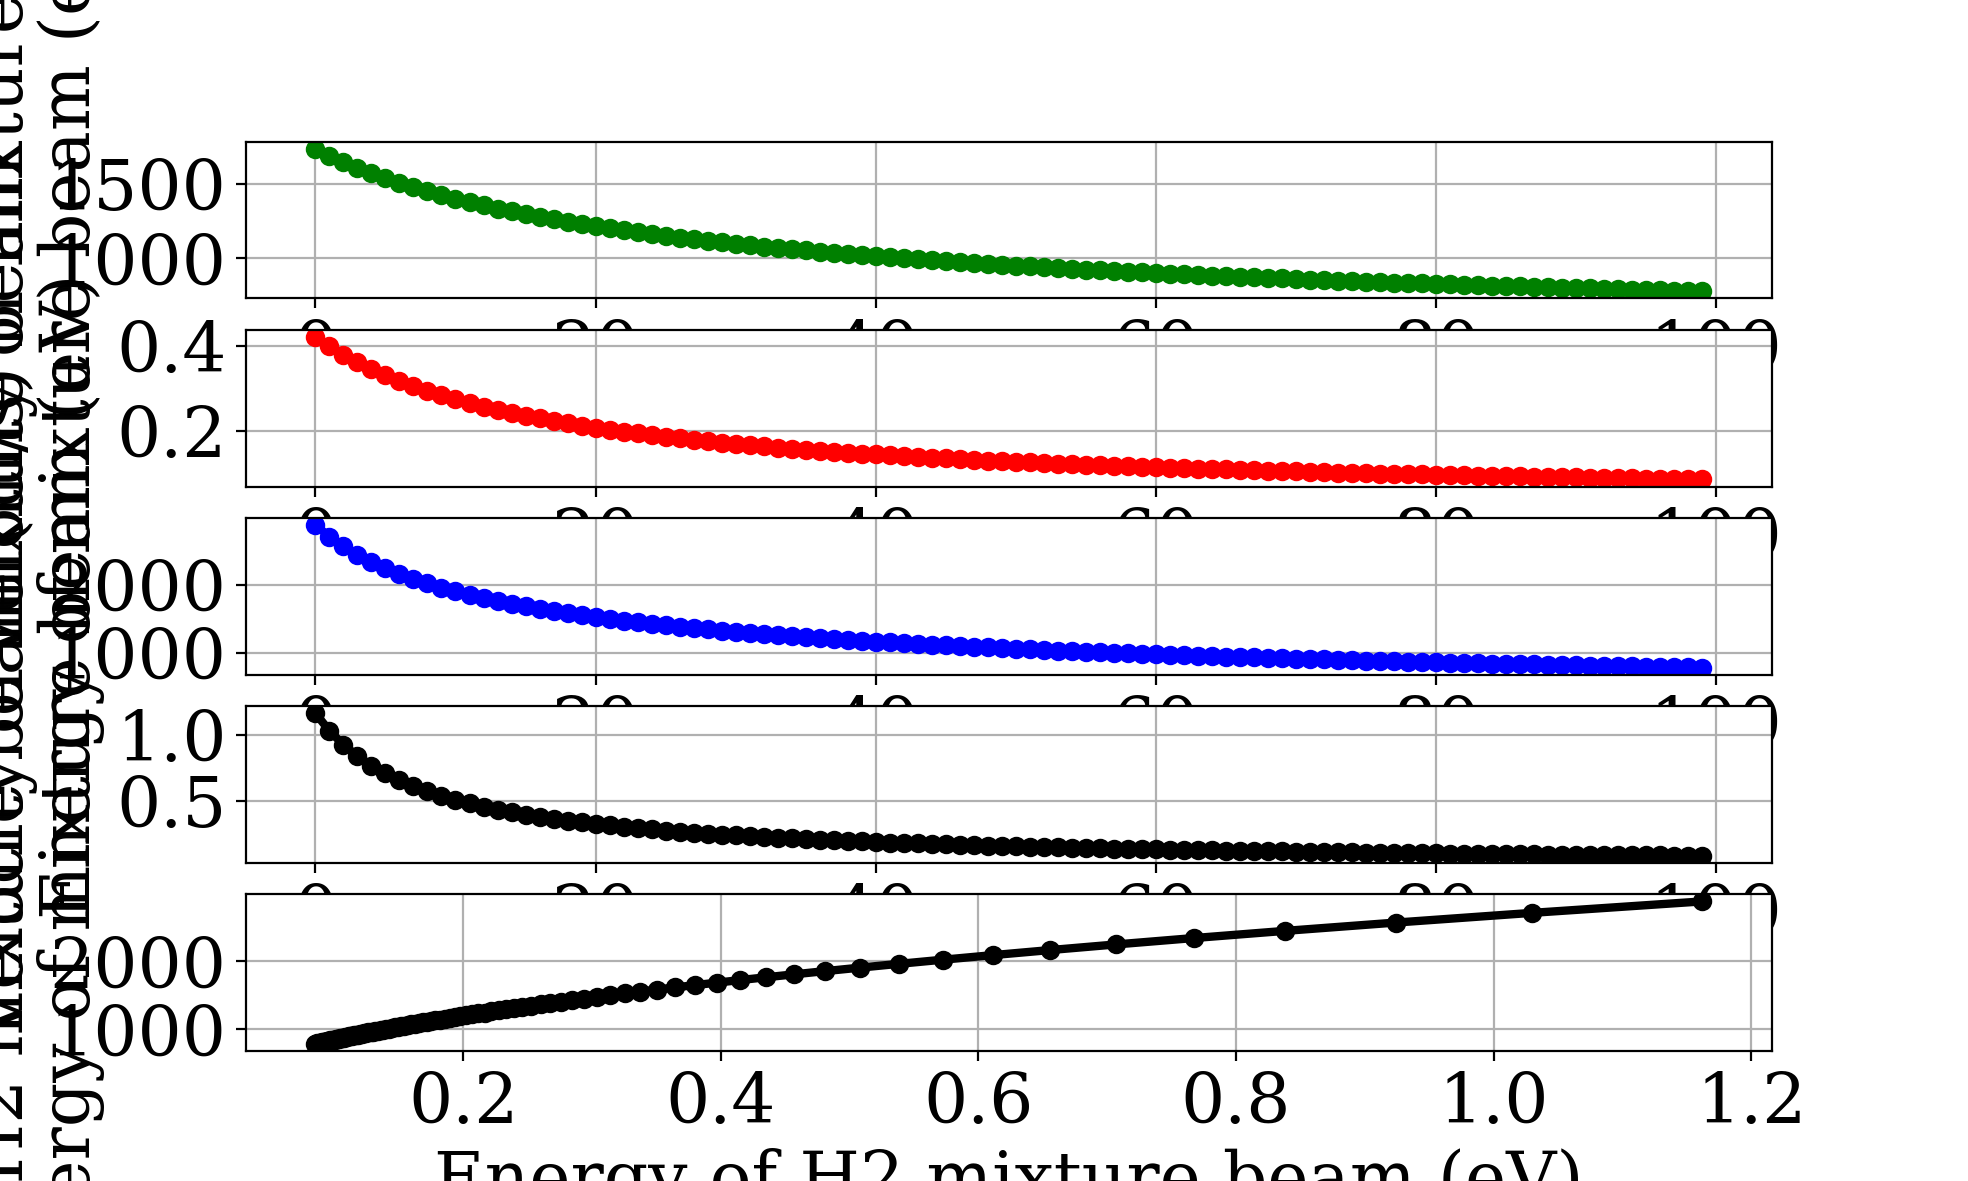

calculated K.E. = 0.17063424
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] 0.27432821379170563
Change in Enthalpy for He: 0.03846799991388927
Change in Enthalpy for CO: 0.05714870280833395
V with heat capacity for He: 1736.0801681001344 m/s
V with heat capacity for CO: 776.9929868477292 m/s
100
100


In [1]:
%matplotlib notebook
import numpy as np # Library for numeric operations
import scipy.optimize
from scipy.optimize import curve_fit 
from scipy.optimize import leastsq
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt # plottting library
from scipy.integrate import odeint # for ODE integration
import scipy.integrate as integrate # importing the module for numeric integration
from lmfit import Minimizer, Parameters, report_fit

# Setting the default options for the plots
from matplotlib import rcParams
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 10
rcParams['font.family'] = 'serif'

# defining the size in terms of cm (mpl uses inches as default)
def cm(value): 
    return value/2.54
#rcParams['figure.figsize'] = cm(10),cm(10)

# making interactive plots in the notebook

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
import numpy as np
import matplotlib.pyplot as plt
import math
#For CO
A=25.56759
B=6.096130
C=4.054656
D=-2.671301
E=0.131021
F=-118.0089
G=227.3665
H=-110.5271
#t=0.29
t=0.3
m_co=28e-3 #Kg/mol (mass of co)
Cp=A+(B*t)+(C*t**2)+(D*t**3)+(E/(t**2))
dH=A*t+((B*t**2)/2)+((C*t**3)/3)+((D*t**4)/4)-(E/t)+F-H
#For He
A2=20.78603
B2=4.850638e-10
C2=-1.582916e-10
D2=1.525102e-11
E2=3.196347e-11
F2=-6.197341
G2=151.3064
H2=0
#t=0.01
t=0.3
dt=290 #Temperature for velocity calculation generally T0-T=298-10=288 K in the calculation
mHe=4e-3 #KG/mol (mass of He)
Cp2=A2 + (B2*t) + (C2*t**2) + (D2*t**3) + E2/(t**2)
print('Cp of He:',Cp2)
print('Cp of CO:',Cp)
dH2=A2*t+((B2*t**2)/2)+((C2*t**3)/3)+((D2*t**4)/4)-(E2/t)+F2-H2
#plt.figure(figsize=(20,8)) 
#Weighted_of_co=0.10
#Weighted_of_He=0.90

#For H2
A3=33.066178
B3=-11.363417
C3=11.432816
D3=-2.772874
E3=-0.158558
F3=-9.980797
G3=172.707974
H3=0.0
t=0.3
m_h2=2.016e-3 #KG/MOL
Cp3=A3 + (B3*t) + (C3*t**2) + (D3*t**3) + E3/(t**2)
dH3=A3*t+((B3*t**2)/2)+((C3*t**3)/3)+((D3*t**4)/4)-(E3/t)+F3-H3


print('Cp of H2:',Cp3)
fig6, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(cm(25),cm(15)))
beamvelocity=[]
concentration=[]
beamvelocitywithH2=[]
Energy_with_He=[]
Energy_with_H2=[]
for i in np.arange(0,100,1):
    dt=290
    weighted_Heat_capacity=i*Cp+(100-i)*Cp2
    weighted_Heat_capacity_forH2mixture=i*Cp+(100-i)*Cp3
    #print(weighted_Heat_capacity)
    weighted_mass=i*m_co+(100-i)*mHe
    weighted_massforH2mixture=i*m_co+(100-i)*m_h2
    #print(weighted_mass)
    V_molebeam=np.sqrt(2*abs(weighted_Heat_capacity)*dt/weighted_mass)
    Energy_experimental_He=0.5*m_co*V_molebeam*V_molebeam*1e-5 #1e-5 multiplied to convert it into eV
    V_molebeamwithH2mixture=np.sqrt(2*abs(weighted_Heat_capacity_forH2mixture)*dt/weighted_massforH2mixture)
    Energy_experimental_H2=0.5*m_co*V_molebeamwithH2mixture*V_molebeamwithH2mixture*1e-5#1e-5 multiplied to convert it into eV
    beamvelocity.append(V_molebeam)
    beamvelocitywithH2.append(V_molebeamwithH2mixture)
    concentration.append(i)
    Energy_with_He.append(Energy_experimental_He)
    Energy_with_H2.append(Energy_experimental_H2)
    
print('calculated K.E. =',0.5*m_co*1104*1104*1e-5)   
ax1.plot(concentration,beamvelocity,'o-',lw=3,color='green')
print(concentration,Energy_with_He[10])
ax1.set_xlabel('CO Concentration in He (%)', fontsize=25)
ax1.set_ylabel('Velocity of mixture beam', fontsize=25)
ax1.grid()

ax2.plot(concentration,Energy_with_He,'o-',lw=3,color='red')
ax2.set_xlabel('CO Concentration in He (%)', fontsize=25)
ax2.set_ylabel('Energy of mixture beam (eV)', fontsize=25)
ax2.grid()

ax3.plot(concentration,beamvelocitywithH2,'o-',lw=3,color='blue')
ax3.set_xlabel('CO Concentration in H2 (%)', fontsize=25)
ax3.set_ylabel('Velocity of mixture beam', fontsize=25)
ax3.grid()

ax4.plot(concentration,Energy_with_H2,'o-',lw=3,color='black')
ax4.set_xlabel('CO Concentration in H2 (%)', fontsize=25)
ax4.set_ylabel('Energy of mixture beam (eV)', fontsize=25)
ax4.grid()

ax5.plot(Energy_with_H2,beamvelocitywithH2,'o-',lw=3,color='black')
ax5.set_xlabel('Energy of H2 mixture beam (eV)', fontsize=25)
ax5.set_ylabel('Velocity of H2 mixture beam (m/s)', fontsize=25)
ax5.grid()


#print(beamvelocity)
V_He=np.sqrt(2*abs(Cp2)*dt/mHe)
V_CO=np.sqrt(2*abs(Cp)*dt/m_co)
print('Change in Enthalpy for He:',dH2)
print('Change in Enthalpy for CO:',dH)

print('V with heat capacity for He:',V_He,'m/s')
#print('V with Change in Enthalpy for He:',V_He)

print('V with heat capacity for CO:',V_CO,'m/s')

#print('Velocity of the molecular beam (Calculated):',V_molebeam,'m/s')
#print('Velocity of the molecular beam (Experimental):',Velocity,'m/s')
#print('V with Change in Enthalpy for CO:',np.sqrt(2*abs(dH)/m_co))

'''Energy=0.5*m_co*V_molebeam*V_molebeam
Energy_experimental=0.5*m_co*Velocity*Velocity
print('Energy of molecular beam (Calculated):',Energy*1e-5,'eV')
print('Energy of molecular beam (Experimental):',Energy_experimental*1e-5,'eV')
'''
#plt.plot(Energy_with_H2,beamvelocitywithH2)
print(len(Energy_with_H2))
print(len(Energy_with_H2))
#fig6.savefig('Beam_velocity_plots.png',bbox_inches='tight',dpi=500)